<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/ML/LinearRegression/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [3]:

# Load the California housing dataset
data = fetch_california_housing()

features = data.data
y = data.target

# Print shape of features and target
print(f"Shape of X : {data.data.shape}")
print(f"Shape of y : {data.target.shape}")

# Print feature names and target names
print(data.feature_names)
print(data.target_names)

# Prints first five rows
print(features[:5])

# Select features HouseAge , AveRooms, AveBedrms, Population, AveOccup
X = features[:, 1:6]   # X = features[:, [1,2,3,4,5]]. this also works

# Prints first five rows
print(X[:5])

# Print 5 rows of target
print(y[:5])

Shape of X : (20640, 8)
Shape of y : (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
[[4.10000000e+01 6.98412698e+00 1.02380952e+00 3.22000000e+02
  2.55555556e+00]
 [2.10000000e+01 6.23813708e+00 9.71880492e-01 2.40100000e+03
  2.10984183e+00]
 [5.20000000e

We need to find w , b such that cost function is optimized to zero or closer for the training data.

Split the data set into training and test. We will be doing just using numpy.More advanced libraries like Sikitlearn can be used, but for practice purpose we will use numpy.

In [4]:
def split_dataset(dataset, ratio):
  # X_train
  # X_test
  # y_train
  # y_test
  num_test_samples = int(len(dataset) * ratio)

  test_set = dataset[:num_test_samples] # we only specified rows param rows till samples
  train_set = dataset[num_test_samples:] # rows from sample to end

  X_test = test_set[:, :-1] # all rows and for columns all but not last one (last is the target)
  X_train = train_set[:, :-1]

  y_train = train_set[:, -1] # all rows and only get last column for columns
  y_test = test_set[:, -1] # all rows and only get last column for columns

  print("Shape of X_train:", X_train.shape)
  print("Shape of X_test:", X_test.shape)
  print("Shape of y_train:", y_train.shape)
  print("Shape of y_test:", y_test.shape)

  return (X_train, X_test, y_train, y_test)



Since california_housing dataset is already separed to features and target, combine as a dataset with features and target to use the above function.

Features to be used are
'HouseAge', 'AveRooms', 'AveBedrms', 'Population',



In [5]:
# feature scaling

def zscore_normalize(X_train):
  mu = np.mean(X_train, axis = 0) # mean

  sigma = np.std(X_train, axis = 0) # standard deviation

  X_norm = (X_train - mu) / sigma # Z-score notmalized

  return (X_norm, mu, sigma)


In [8]:
# Split dataset to training and test sets

combined_dataset = np.concatenate((data.data, data.target.reshape(-1,1)), axis=1)
print("Combined dataset")
print(combined_dataset[:5])

X_train_unnorm, X_test, y_train, y_test = split_dataset(combined_dataset, 0.2)

X_train_unnorm = X_train_unnorm[:, 1:5] # all rows of training set and just select 4 features
X_test = X_test[:, 1:5] # all rows of training set and just select 4 features

X_train, mu, sigma = zscore_normalize(X_train_unnorm)
print(X_train[:5])
print(X_test[:5])
print(y_train[:5])
print(y_test[:5])


Combined dataset
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02
   4.52600000e+00]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02
   3.58500000e+00]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02
   3.52100000e+00]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02
   3.41300000e+00]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02
   3.42200000e+00]]
Shape of X_train: (16512, 8)
Shape of X_test: (4128, 8)
Shape of y_train: (16512,)
Shape of y_test: (4128,)
[[ 1.79148266 -0.07096948 -0.20444119 -0.3817267 ]
 [ 1.4726742  -0.15213549 -0.11244247  0.0471942 ]
 [ 1.87118478 -0.

Find y_hat = f(x) = wx+b



Fit the model to find parameters - This is multiple Linear regreassion

1. Predict y_predected
2. compute cost MSE j(w_vector, b)
3. Find gradient descent to find the best fitting w_vector
4. Use final parameters w_vector_final and b_final for predecting test data
5. line plot y_test vs y_test_predected.

In [9]:
# Uses numpy vectorization

def predict(X_train, w_vector, b):
  # w_vector = w_vector.reshape(-1, 1)
  y_predicted = np.dot(X_train, w_vector) + b
  return y_predicted


Finding gradient - which is nothing but slope at a given point

gradient = 1/m * sum (y_hat - y) * x

In [10]:
# Here gradient_w will be a vector
# X_train will be a Matrix
# y_train and y_train_predected will be vectors
# m is a scalar
def gradient_w(X_train, y_train, y_train_predected, m):
  # gradinet_w = 1/m * np.sum((y_train_predected - y_train) * X_train)

  print(X_train.shape)
  print((y_train_predected - y_train).shape)

  gradinet_w = (1/m) * np.dot(X_train.T, (y_train_predected - y_train))

  return gradinet_w

In [12]:
# Here gradient_w will be a vector
# X_train will be a Matrix
# y_train and y_train_predected will be vectors
# m is a scalar
def gradient_b(y_train, y_train_predected, m):
  gradinet_b = (1/m) * np.sum(y_train_predected - y_train)
  return gradinet_b

Find gradeint descent
set learning rate alpha to 0.01
and number of iterations

In [11]:
# Compute cost

def compute_cost(y_predicted, y, m):
  j_cost = (1 / (2 * m)) * np.sum((y_predicted - y) ** 2)
  return j_cost

In [ ]:
alpha = 0.001
num_iter = 5000

print(type(len(X_train)))
j_hist = []
iterations = []
# grad_desc_w_param = np.zeros(X_train.shape[1])
grad_desc_w_param = np.zeros(X_train.shape[1])

grad_desc_b_param = 0
for i in range(1,num_iter) :
  y_train_predected = predict(X_train, grad_desc_w_param, grad_desc_b_param)
  # print(y_train_predected.shape)
  # Compute cost at each iteration
  j_cost = compute_cost(y_train_predected, y_train, len(y_train))

  if i%100 == 0 :
    j_hist.append(j_cost)
    print(f"Cost - {j_cost} at Gradeint vector w - {grad_desc_w_param} and b - {grad_desc_b_param} at iteration - {i}")
    iterations.append(i)
  grad_desc_w_param -= alpha * gradient_w(X_train, y_train,y_train_predected,len(X_train))
  grad_desc_b_param -= alpha * gradient_b(y_train, y_train_predected, len(X_train))
  i +=1

# Find the iteration with the lowest cost
min_cost_iteration = np.argmin(j_hist)
min_cost = j_hist[min_cost_iteration]

print("Iteration with lowest cost:", min_cost_iteration)
print("Lowest cost:", min_cost)

w_final_vec = grad_desc_w_param
b_final = grad_desc_b_param

print(f"Final w parameters - {w_final_vec} and b_final - {b_final}")

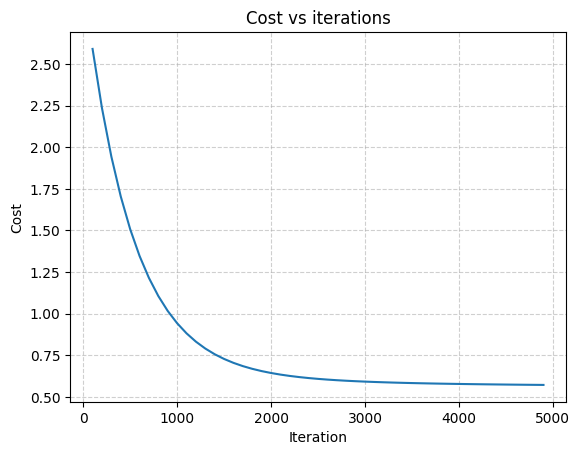

In [27]:
plt.plot(iterations, j_hist)
# Add labels and a title
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs iterations')
plt.grid(True, linestyle='--', alpha=0.6)
# Display the plot
plt.show()

In [18]:
print(np.zeros(X_train.shape[1]))

print(np.array([0,0,0,0]))

[0. 0. 0. 0.]
[0 0 0 0]


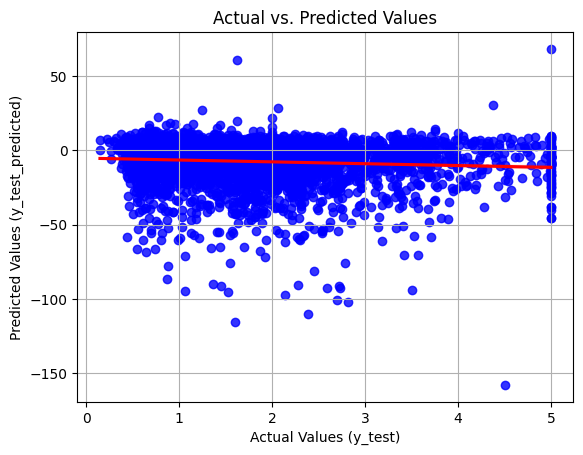

In [30]:
# Predict on test set
y_test_predicted = predict(X_test,w_final_vec ,b_final)

import seaborn as sns
# Create a scatter plot
sns.regplot(x=y_test, y=y_test_predicted, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_predicted)')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

# Display the plot
plt.show()

